# First we download dataset from IMDB offical website

The dataset includes not only movies, but also tv shows, shorts, dramas and etc. that we don't want in this movie project.

So we need to filter the movies out and save it to `movie_list.csv`

It may take few minutes...

In [10]:
file_basics = open('../dataset/title.basics.tsv','r')
file_movie_list = open('../dataset/movie_list.tsv','w')

# write header
line = file_basics.readline().split('\t')
file_movie_list.write('\t'.join([line[0],line[2],line[5],line[7],line[8]]))

# filter out all the movies with available Year Run_time
len_file_basics = 6218836
for line_num, line in enumerate(file_basics):
    line = line.split('\t')
    if line[1] == 'movie' and line[2]!='\\N' and line[5]!='\\N' and line[7]!='\\N':
        file_movie_list.write('\t'.join([line[0],line[2],line[5],line[7],line[8]]))
        print("progress:{:.3f}".format(line_num / len_file_basics * 100),end='\r',flush=True)
file_basics.close()
file_movie_list.close()


### After we filter out movies, let us see the distribution of movies on Years and Run time

In [14]:
import pandas as pd
file_movie_list = pd.read_csv('../dataset/movie_list.tsv', delimiter='\t')
file_movie_list.describe()

,Year,Run_time
count,329291.000000,329291.000000
mean,1992.112016,88.330622
std,25.882660,146.499533
min,1894.000000,1.000000
25%,1976.000000,72.000000
50%,2003.000000,88.000000
75%,2013.000000,100.000000
max,2022.000000,59460.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126128fd0>]],
      dtype=object)

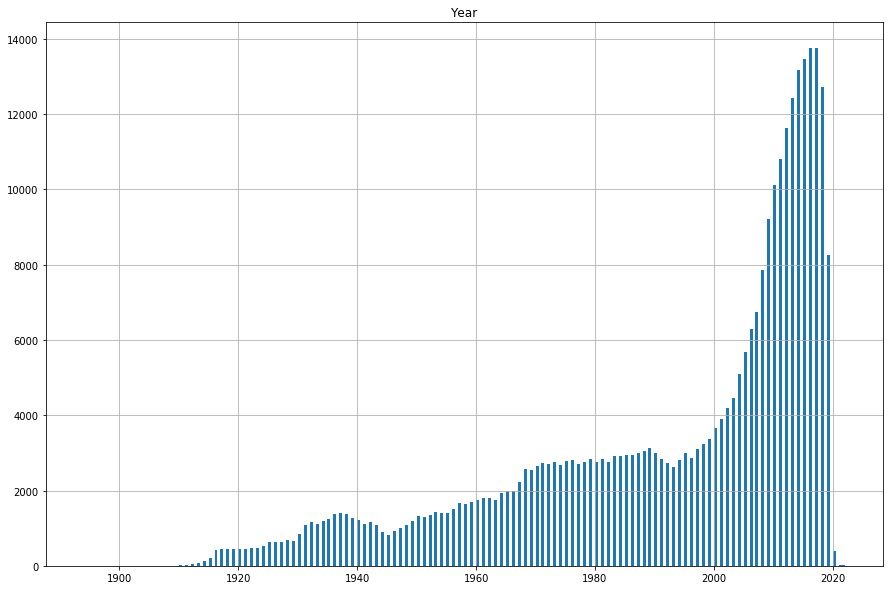

In [15]:
import matplotlib.pyplot as plt
file_movie_list.hist(column="Year",figsize=(15,10),bins=256)

In [9]:
file_movie_list[(file_movie_list['Year']>=2000) &
                (file_movie_list['Year']<=2018) &
                (file_movie_list['Run_time']<=180) &
                (file_movie_list['Run_time']>=60)].to_csv(
    '../dataset/movie_2000_to_2018.tsv', sep='\t', index=None)

In [10]:
file_movie_list = pd.read_csv('../dataset/movie_2000_to_2018.tsv', delimiter='\t')
file_movie_list.describe()

,Year,Run_time
count,140853.000000,140853.000000
mean,2011.176482,93.231049
std,4.991285,20.118494
min,2000.000000,60.000000
25%,2008.000000,80.000000
50%,2012.000000,90.000000
75%,2015.000000,102.000000
max,2018.000000,180.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126e37890>]],
      dtype=object)

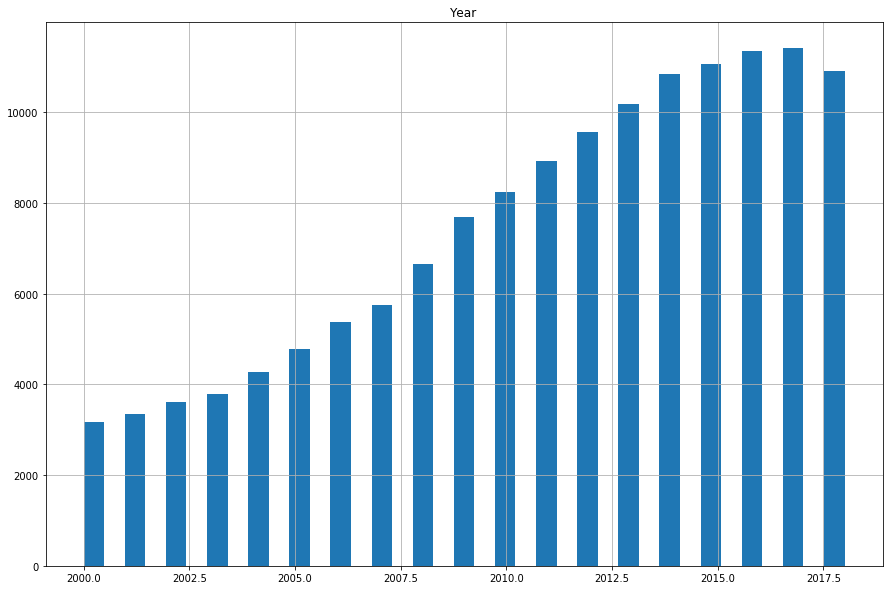

In [11]:
file_movie_list.hist(column="Year",figsize=(15,10),bins=37)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128014fd0>]],
      dtype=object)

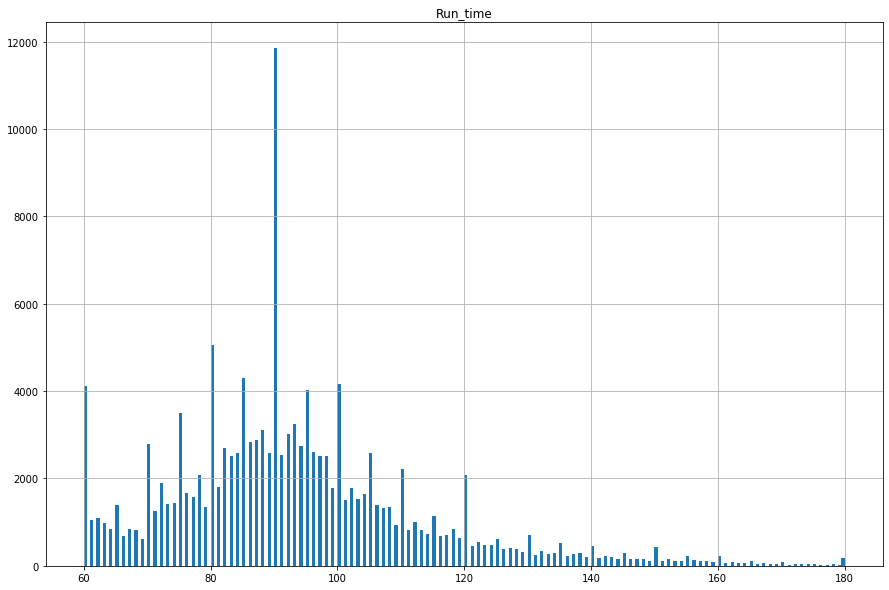

In [12]:
file_movie_list.hist(column="Run_time",figsize=(15,10),bins=240)

## Then we add ratings, writers, directors and other elements from `crew`, `ratings` to `movie_2000_to_2018_part_1.csv`

In [41]:
file_crew = open('../dataset/title.crew.tsv','r')
file_movie_2000_to_2018 = open('../dataset/movie_2000_to_2018.tsv','r')
file_movie_2000_to_2018_part_1 = open('../dataset/movie_2000_to_2018_part_1.tsv','w')
_ = file_crew.readline()
_ = file_movie_2000_to_2018.readline()
for step, line in enumerate(file_movie_2000_to_2018):
    tt = line.split('\t')[0]
    tt_num = int(tt.split('tt')[1] + '0' * (10-len(tt)))
    while True:
        line_crew = file_crew.readline()
        line_crew = line_crew.split('\t')
        crew_tt = line_crew[0]
        if int(crew_tt.split('tt')[1]+ '0' * (10-len(crew_tt))) >= tt_num:
            break    
    if int(crew_tt.split('tt')[1]+ '0' * (10-len(crew_tt))) > tt_num:
        continue  
    directors = line_crew[1]
    writers = line_crew[2].split('\n')[0]
    new_line = [line.split('\n')[0], directors, writers]
    new_line = '\t'.join(new_line) + '\n'
    file_movie_2000_to_2018_part_1.write(new_line)
    

file_crew.close()
file_movie_2000_to_2018.close()
file_movie_2000_to_2018_part_1.close() 
    


In [42]:
file_ratings = open('../dataset/title.ratings.tsv','r')
file_movie_2000_to_2018_part_1 = open('../dataset/movie_2000_to_2018_part_1.tsv','r')
file_movie_2000_to_2018_part_2 = open('../dataset/movie_2000_to_2018_part_2.tsv','w')
_ = file_ratings.readline()
_ = file_movie_2000_to_2018_part_1.readline()
_ = file_ratings.readline()
for step, line in enumerate(file_movie_2000_to_2018_part_1):
    tt = line.split('\t')[0]
    tt_num = int(tt.split('tt')[1] + '0' * (10-len(tt)))
    while True:
        line_ratings = file_ratings.readline()
        line_ratings = line_ratings.split('\t')
        ratings_tt = line_ratings[0]
        if int(ratings_tt.split('tt')[1]+ '0' * (10-len(ratings_tt))) >= tt_num:
            break    
    if int(ratings_tt.split('tt')[1]+ '0' * (10-len(ratings_tt))) > tt_num:
        continue  
    Rating = line_ratings[1]
    numVoters = line_ratings[2].split('\n')[0]
    new_line = [line.split('\n')[0], Rating, numVoters]
    new_line = '\t'.join(new_line) + '\n'
    file_movie_2000_to_2018_part_2.write(new_line)
    

file_ratings.close()
file_movie_2000_to_2018_part_1.close()
file_movie_2000_to_2018_part_2.close() 

## Then we run the spider.py according to `movie_2000_to_2018_part_2.tsv` to download poster image and other information such as actors and storyline to tsv file